## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [39]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [40]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check dimension of data

In [4]:
iris_data.shape

(152, 6)

In [6]:
#Check data Type
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# Check for NaN/Null values
iris_data.isnull().sum(axis=0)
# the dataframe contains null values 

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [41]:
test_df = iris_data
x = pd.DataFrame()
y = pd.DataFrame()
for column in test_df.columns:
    if(column != 'Species'):
        x[column] = test_df[column]
    else:
        y[column] = test_df[column]
print(x)
print("!!!!")
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
5      6            5.4           3.9            1.7           0.4
6      7            4.6           3.4            1.4           0.3
7      8            5.0           3.4            1.5           0.2
8      9            4.4           2.9            1.4           0.2
9     10            4.9           3.1            1.5           0.1
10    11            5.4           3.7            1.5           0.2
11    12            4.8           3.4            1.6           0.2
12    13            4.8           3.0            1.4           0.1
13    14            4.3           3.0            1.1          

In [11]:
#Check the dataset
print(y)
print(X)

            Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
6       Iris-setosa
7       Iris-setosa
8       Iris-setosa
9       Iris-setosa
10      Iris-setosa
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15      Iris-setosa
16      Iris-setosa
17      Iris-setosa
18      Iris-setosa
19      Iris-setosa
20      Iris-setosa
21      Iris-setosa
22      Iris-setosa
23      Iris-setosa
24      Iris-setosa
25      Iris-setosa
26      Iris-setosa
27      Iris-setosa
28      Iris-setosa
29      Iris-setosa
..              ...
122  Iris-virginica
123  Iris-virginica
124  Iris-virginica
125  Iris-virginica
126  Iris-virginica
127  Iris-virginica
128  Iris-virginica
129  Iris-virginica
130  Iris-virginica
131  Iris-virginica
132  Iris-virginica
133  Iris-virginica
134  Iris-virginica
135  Iris-virginica
136  Iris-virginica
137  Iris-virginica
138  Iris-virginica
139  Iris-virginica


### Find the distribution of target variable (Class) (1 Marks)

### Plot the distribution of target variable using histogram

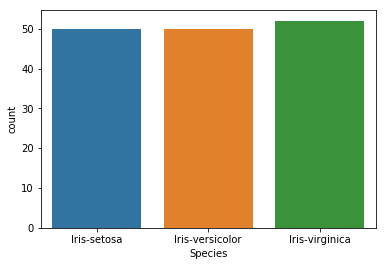

In [69]:
sns.countplot(iris_data['Species'])


### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\santosh\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\santosh\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


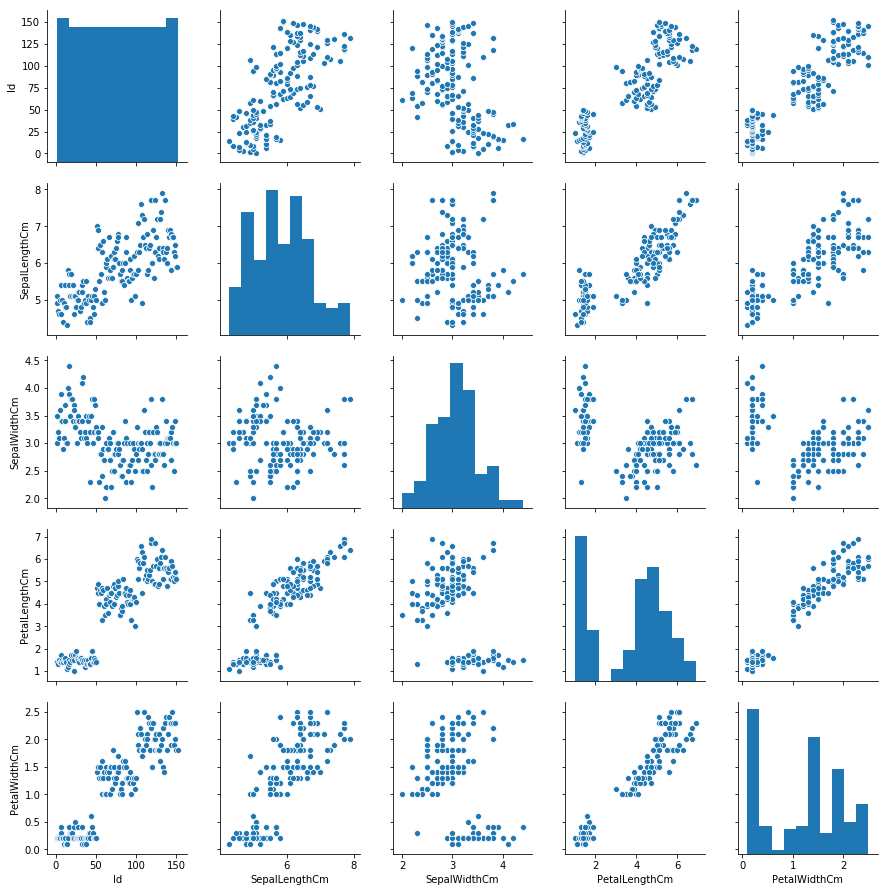

In [15]:
import seaborn as sns
sns.pairplot(iris_data)

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [ ]:
# Id can be dropped beacuse it has no contribution to the model

In [42]:
#Drop Id variable from data
iris_data.drop('Id',1, inplace = True)
iris_data.head()




,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
x.drop('Id',1,inplace=True)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Correlation among all variables and give your insights (1 Marks)

In [17]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [46]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
60             5.0           2.0            3.5           1.0
35             5.0           3.2            1.2           0.2
103            6.3           2.9            5.6           1.8
117            7.7           3.8            6.7           2.2
66             5.6           3.0            4.5           1.5
43             5.0           3.5            1.6           0.6
38             4.4           3.0            1.3           0.2
69             5.6           2.5            3.9           1.1
121            5.6           2.8            4.9           2.0
112            6.8           3.0            5.5           2.1
26             5.0           3.4            1.6           0.4
120            6.9           3.2            5.7           2.3
61             5.9           3.0            4.2           1.5
41             4.5           2.3            1.3           0.3
47             4.6           3.2            1.4           0.2
32      

### Do Feature Scaling ( 1 Marks)

In [50]:
# Use StandardScaler or similar methods

from sklearn.preprocessing import StandardScaler

X_train.head()
# test = cell_info
scaler = StandardScaler() 
scaled_values = scaler.fit_transform(X_train._get_numeric_data())
# scaled_df = pd.DataFrame(scaled_values, columns = ['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
X_train.loc[:,:] = scaled_values
# iris_data.head()
X_train.head()


C:\Users\santosh\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\santosh\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,-0.975363,-2.428709,-0.106823,-0.234089
35,-0.975363,0.329446,-1.399945,-1.278322
103,0.585218,-0.360092,1.073853,0.810144
117,2.265844,1.708524,1.692303,1.332260
66,-0.255095,-0.130246,0.455404,0.418556


In [51]:
y_train.head()

,Species
60,Iris-versicolor
35,Iris-setosa
103,Iris-virginica
117,Iris-virginica
66,Iris-versicolor


### Train and Fit NaiveBayes Model(2 Marks)

In [62]:
#Fit the model
# Replacing the missing values with median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
#Predict
nb_predict = nb_model.predict(X_test)
print(nb_predict)

['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [ ]:
# show Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
nb_matrix = confusion_matrix(y_test, nb_predict)
print(nb_matrix)

[[ 0  0  8]
 [ 0  0 13]
 [ 0  0 10]]


In [ ]:
# show accuracy

In [66]:
from sklearn.metrics import  accuracy_score

print( accuracy_score(y_test, nb_predict))

0.3225806451612903


In [ ]:
#Show precision and Recall metrics

In [67]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, nb_predict))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00         8
Iris-versicolor       0.00      0.00      0.00        13
 Iris-virginica       0.32      1.00      0.49        10

      micro avg       0.32      0.32      0.32        31
      macro avg       0.11      0.33      0.16        31
   weighted avg       0.10      0.32      0.16        31



## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [52]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [53]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [74]:
iris.isna().sum(axis=0)
iris.fillna(iris.median(),inplace=True)


In [75]:
iris.isna().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [92]:


for species in iris['Species']:
    if(species == 'Iris-setosa'):
        iris['Species'].replace('Iris-setosa',0, inplace = True)
    elif(species == 'Iris-virginica' ):
        iris['Species'].replace('Iris-virginica',1, inplace = True)
    else:
        iris['Species'].replace('Iris-versicolor',2, inplace = True)
iris.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [101]:
iris['Species'] = iris['Species'].astype(int)
iris.dtypes
iris.corr()
# All have corelation > 0.1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.462141
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.460028
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.612102
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.648618
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.579519
Species,0.462141,0.460028,-0.612102,0.648618,0.579519,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [105]:
iris.var()
# All have variance > 0.1

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.662252
dtype: float64

In [106]:
# Id can be dropped
iris.drop('Id',1,inplace = True)


## Question 6

*Plot the scatter matrix for all the variables.*

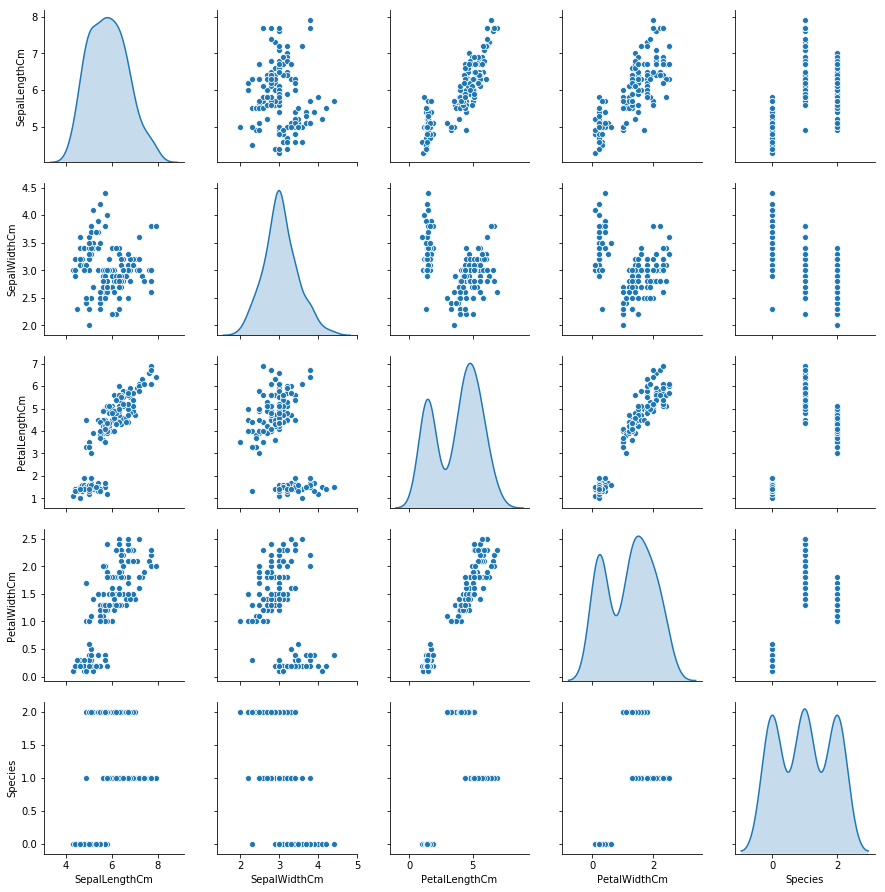

In [107]:
sns.pairplot(iris, diag_kind='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [108]:
test_df = iris
x = pd.DataFrame()
y = pd.DataFrame()
for column in test_df.columns:
    if(column != 'Species'):
        x[column] = test_df[column]
    else:
        y[column] = test_df[column]
print(x)
print("!!!!")
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5           1.40           0.2
1              4.9           3.0           1.40           0.2
2              4.7           3.2           1.30           0.2
3              4.6           3.1           1.50           0.2
4              5.0           3.6           1.40           0.2
5              5.4           3.9           1.70           0.4
6              4.6           3.4           1.40           0.3
7              5.0           3.4           1.50           0.2
8              4.4           2.9           1.40           0.2
9              4.9           3.1           1.50           0.1
10             5.4           3.7           1.50           0.2
11             4.8           3.4           1.60           0.2
12             4.8           3.0           1.40           0.1
13             4.3           3.0           1.10           0.1
14             5.8           4.0           1.20           0.2
15      

In [109]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=40)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_list = [3,5,9]
scores = {}
scores_list = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,  metric = 'euclidean')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
print(scores)


{3: 1.0, 5: 0.967741935483871, 9: 0.9354838709677419}


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_list = range(1,21,2)
scores = {}
scores_list = []
mse_list = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,  metric = 'euclidean')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    mse_list.append(1-metrics.accuracy_score(y_test,y_pred))
    
print(mse_list)


[0.06451612903225812, 0.0, 0.032258064516129004, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.032258064516129004, 0.032258064516129004, 0.06451612903225812, 0.09677419354838712]


In [120]:
mse_lowest = min(mse_list)
print(mse_lowest)
#  k = 3 has the lowest mse

0.0


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

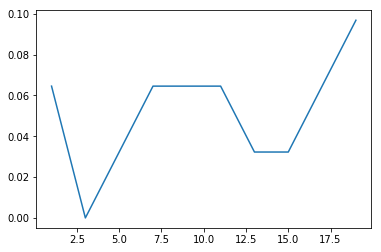

In [123]:
# Plotting k and scores_list
import matplotlib.pyplot as plt
plt.plot(k_list,mse_list)